# Import Required Libraries and Load Data
Import necessary libraries (pandas, numpy, matplotlib, seaborn) and load the World Bank data from the JSON file. Examine the data structure and organize it into a workable format.

In [2]:
# Import Required Libraries and Load Data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

# Load the World Bank data from the JSON file
file_path = 'world_bank_data_normalized.json'  # Adjust path as needed
with open(file_path, 'r') as file:
    data = json.load(file)

# Examine the data structure
print("Keys in the data:", data.keys())
print("\nMetadata:")
print(data['metadata']['source'])
print(data['metadata']['description'])
print(f"Last updated: {data['metadata']['last_updated']}")
print(f"\nNumber of indicators: {len(data['indicators'])}")
print(f"Number of countries: {len(data['countries'])}")

# Get indicator names for reference
indicator_names = {code: info['name'] for code, info in data['indicators'].items()}
print("\nSample indicators:")
for code, name in list(indicator_names.items())[:5]:
    print(f"{code}: {name}")

# Organize the data into a workable format
countries_data = data['countries']
indicators_data = data['indicators']

# Convert the data into a DataFrame
country_list = []
for country in countries_data:
    if 'name' not in country or 'ISO' not in country or 'data' not in country:
        continue  # Skip incomplete entries
        
    country_name = country['name']
    country_iso = country['ISO']
    
    for indicator, values in country['data'].items():
        indicator_name = indicator_names.get(indicator, indicator)
        for year, value in values.items():
            country_list.append([country_name, country_iso, indicator, indicator_name, year, float(value)])

df = pd.DataFrame(country_list, columns=['Country', 'ISO', 'Indicator_Code', 'Indicator', 'Year', 'Value'])

# Display the first few rows of the DataFrame
print("\nSample of processed data:")
display(df.head())

# Basic statistics
print("\nDataset shape:", df.shape)
print("\nNumber of unique countries:", df['Country'].nunique())
print("Number of unique indicators:", df['Indicator_Code'].nunique())
print("Year range:", df['Year'].min(), "to", df['Year'].max())

Keys in the data: dict_keys(['metadata', 'indicators', 'countries'])

Metadata:
World Bank
World Bank Development Indicators
Last updated: 2025-03-07

Number of indicators: 17
Number of countries: 217

Sample indicators:
MS.MIL.TOTL.P1: Armed forces personnel, total
MS.MIL.XPRT.KD: Arms exports (SIPRI trend indicator values)
MS.MIL.MPRT.KD: Arms imports (SIPRI trend indicator values)
BM.KLT.DINV.WD.GD.ZS: Foreign direct investment, net outflows (% of GDP)
EG.USE.COMM.FO.ZS: Fossil fuel energy consumption (% of total)

Sample of processed data:


,Country,ISO,Indicator_Code,Indicator,Year,Value
0,Afghanistan,AFG,MS.MIL.TOTL.P1,"Armed forces personnel, total",1985,47000.0
1,Afghanistan,AFG,MS.MIL.TOTL.P1,"Armed forces personnel, total",1989,55000.0
2,Afghanistan,AFG,MS.MIL.TOTL.P1,"Armed forces personnel, total",1990,58000.0
3,Afghanistan,AFG,MS.MIL.TOTL.P1,"Armed forces personnel, total",1991,45000.0
4,Afghanistan,AFG,MS.MIL.TOTL.P1,"Armed forces personnel, total",1992,45000.0



Dataset shape: (92987, 6)

Number of unique countries: 217
Number of unique indicators: 17
Year range: 1960 to 2023


## Create Dataframes for each Indicator 

In [3]:
# Get all unique indicator codes
unique_indicators = df['Indicator_Code'].unique()

# Create a dictionary to store each indicator's dataframe
indicator_dfs = {}

# Create a separate dataframe for each indicator
for ind_code in unique_indicators:
    # Filter the main dataframe for this indicator
    indicator_df = df[df['Indicator_Code'] == ind_code].copy()
    
    # Store in dictionary with indicator code as key
    indicator_dfs[ind_code] = indicator_df
    
    # Print basic info about the indicator dataframe
    indicator_name = indicator_names.get(ind_code, ind_code)

# Example: Access the fossil fuel energy consumption dataframe
fossil_fuel_df = indicator_dfs['EG.USE.COMM.FO.ZS']
print("\nSample of fossil fuel energy consumption dataframe:")
display(fossil_fuel_df.head())

# Convert to pivot table format for easier time series analysis
def create_pivot_df(indicator_code):
    """Create a pivot table with countries as rows and years as columns"""
    ind_df = indicator_dfs[indicator_code]
    pivot_df = ind_df.pivot_table(index='Country', columns='Year', values='Value')
    return pivot_df

# Example: Create a pivot table for fossil fuel consumption
fossil_fuel_pivot = create_pivot_df('EG.USE.COMM.FO.ZS')
print("\nPivot table for fossil fuel consumption:")
display(fossil_fuel_pivot.head())


Sample of fossil fuel energy consumption dataframe:


,Country,ISO,Indicator_Code,Indicator,Year,Value
426,Albania,ALB,EG.USE.COMM.FO.ZS,Fossil fuel energy consumption (% of total),1971,74.660703
427,Albania,ALB,EG.USE.COMM.FO.ZS,Fossil fuel energy consumption (% of total),1972,77.174111
428,Albania,ALB,EG.USE.COMM.FO.ZS,Fossil fuel energy consumption (% of total),1973,74.366634
429,Albania,ALB,EG.USE.COMM.FO.ZS,Fossil fuel energy consumption (% of total),1974,75.397463
430,Albania,ALB,EG.USE.COMM.FO.ZS,Fossil fuel energy consumption (% of total),1975,75.746425



Pivot table for fossil fuel consumption:


Year,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,,
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,64.455990,65.122392,63.847176,63.421726,63.239004,61.502765,57.754082,56.395339,61.421801,NaN
Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,99.740019,99.752084,99.821136,99.810619,99.847835,99.887476,99.858917,99.910365,99.977917,NaN
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,31.674674,34.742476,37.960760,41.799331,42.992515,43.849784,48.010060,46.508554,48.305593,NaN
Antigua and Barbuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,88.653228,89.225378,90.651789,89.611993,89.503243,88.853811,89.024907,88.966064,87.722407,NaN


## Visualise the G20 Countries from 1970-2022 for each Indicators 

Available G20 countries for fossil fuel consumption data: 19/19
Missing countries: set()


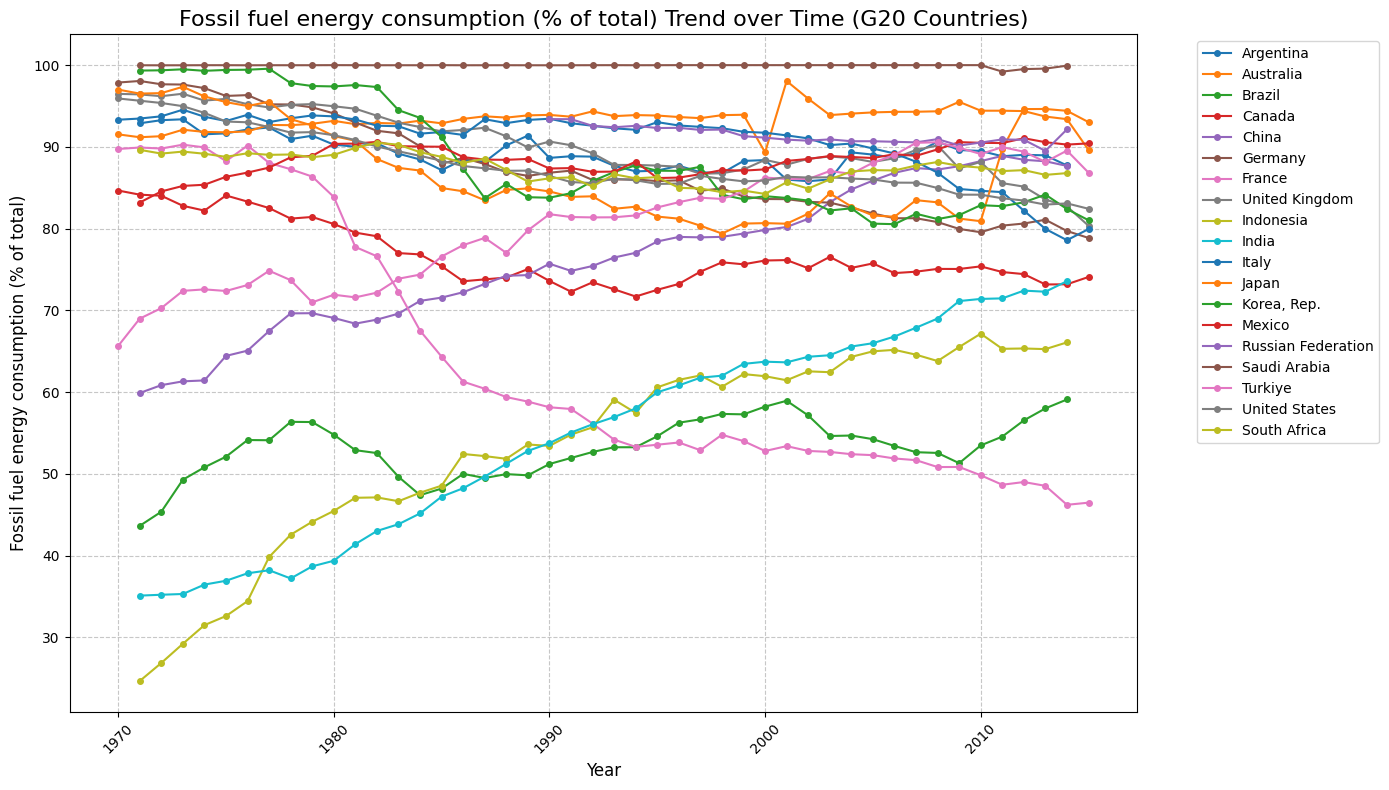

In [4]:
# Define G20 countries
g20_iso = [ 'ARG', 'AUS', 'BRA', 'CAN', 'CHN', 'FRA', 'DEU', 'IND', 'IDN', 'ITA', 'JPN', 'MEX', 'RUS', 'SAU', 'ZAF', 'KOR', 'TUR', 'GBR', 'USA' ]

# Create a function to visualize an indicator for G20 countries
def visualize_indicator_g20(indicator_code, year_range=(1970, 2022), title_suffix=""):
    # Get the dataframe for this indicator
    ind_df = indicator_dfs[indicator_code]
    
    # Filter for G20 countries and specified years
    g20_df = ind_df[
        (ind_df['ISO'].isin(g20_iso)) & 
        (ind_df['Year'].astype(int) >= year_range[0]) & 
        (ind_df['Year'].astype(int) <= year_range[1])
    ]
    
    # Check if we have data for G20 countries
    available_countries = g20_df['ISO'].unique()
    
    # Create pivot table with years as columns and countries as rows
    pivot_df = g20_df.pivot_table(index='ISO', columns='Year', values='Value')
    
    # Plot the data
    plt.figure(figsize=(14, 8))
    
    # Plot each country's data with the full country name in the label
    for country in pivot_df.index:
        plt.plot(pivot_df.columns.astype(int), pivot_df.loc[country], 
                 marker='o', markersize=4, label= g20_df[g20_df['ISO'] == country]['Country'].values[0]) 
    
    # Get the indicator name
    indicator_name = indicator_names.get(indicator_code, indicator_code)
    
    # Add title and labels
    plt.title(f"{indicator_name} {title_suffix} (G20 Countries)", fontsize=16)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel(indicator_name, fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # Add legend outside the plot
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
    
    # Rotate x-axis labels
    plt.xticks(rotation=45)
    
    plt.tight_layout()

    # Sanitize filename by replacing invalid characters
    safe_filename = indicator_name.replace('/', '-').replace(':', '-').replace(' ', '_')
    
    # Save the plot as its indicator name in a file called feature selection plots
    plt.savefig(f'feature_selection_plots/{indicator_name}.png')
    
    return available_countries, pivot_df

# Let's visualize fossil fuel energy consumption for G20 countries
available_countries, pivot_data = visualize_indicator_g20('EG.USE.COMM.FO.ZS', 
                                                         title_suffix="Trend over Time")

# Print which G20 countries have data for this indicator
print(f"Available G20 countries for fossil fuel consumption data: {len(available_countries)}/{len(g20_iso)}")
print("Missing countries:", set(g20_iso) - set(available_countries))


FileNotFoundError: [Errno 2] No such file or directory: '/Users/louisswanepoel/Desktop/git_repos/arms-trade-dashboard/data/world_bank/feature_selection_plots/Political Stability and Absence of Violence/Terrorism: Percentile Rank.png'

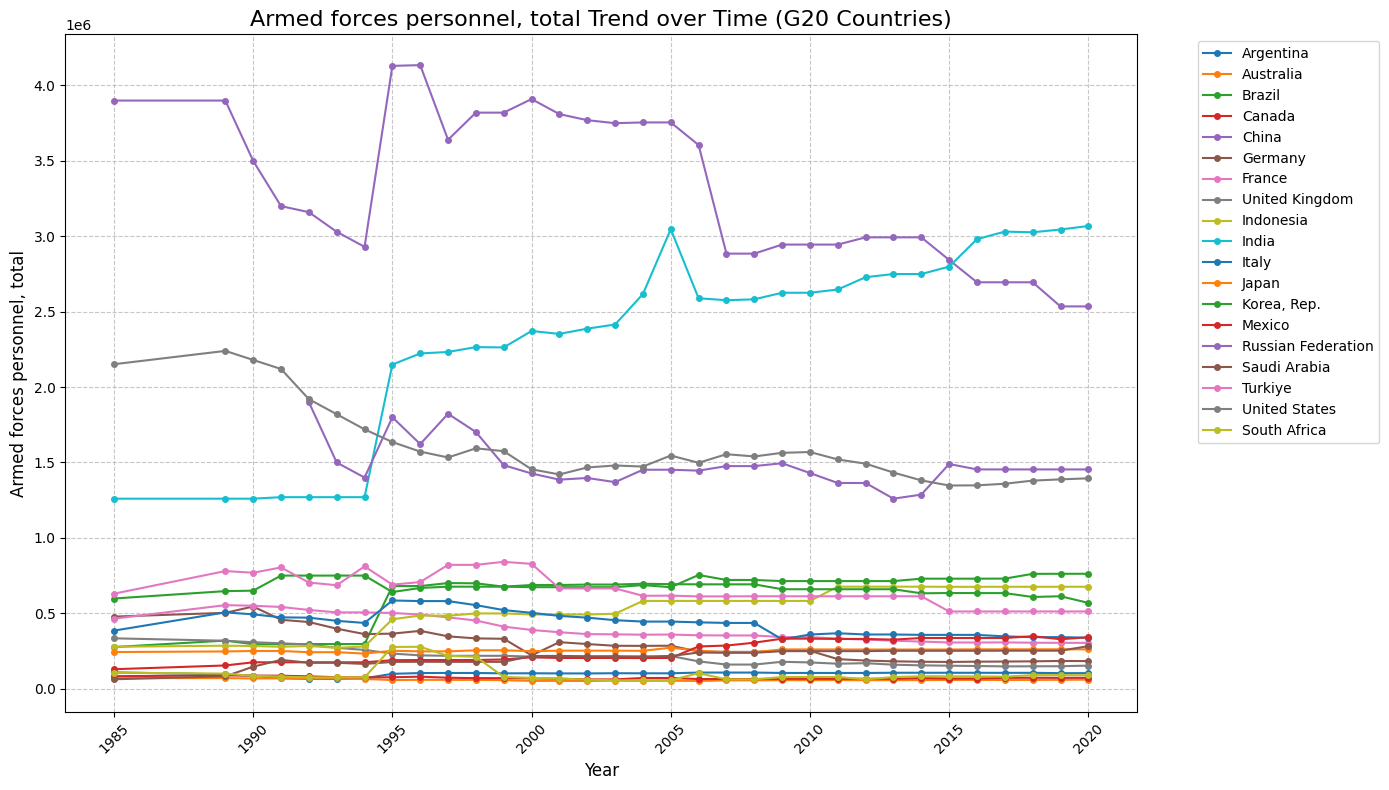

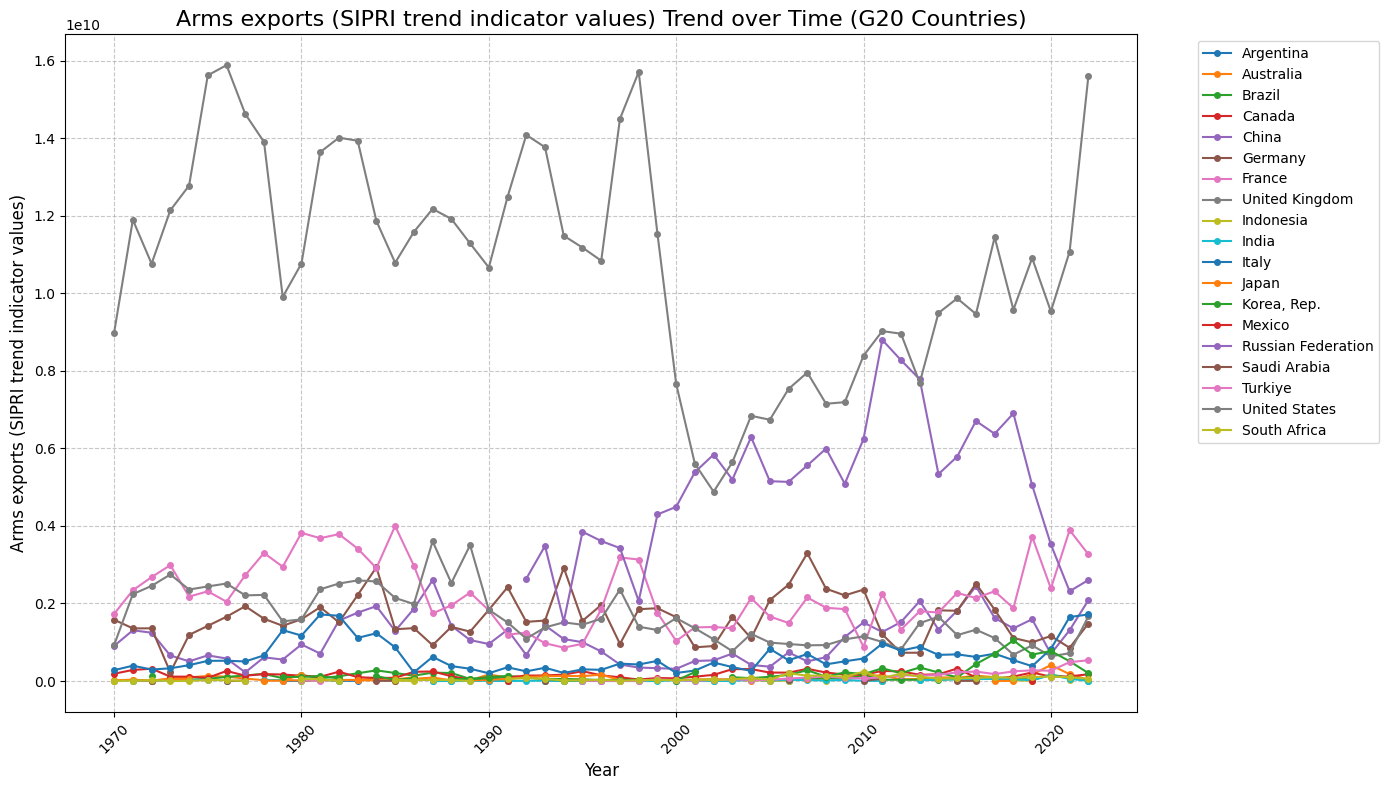

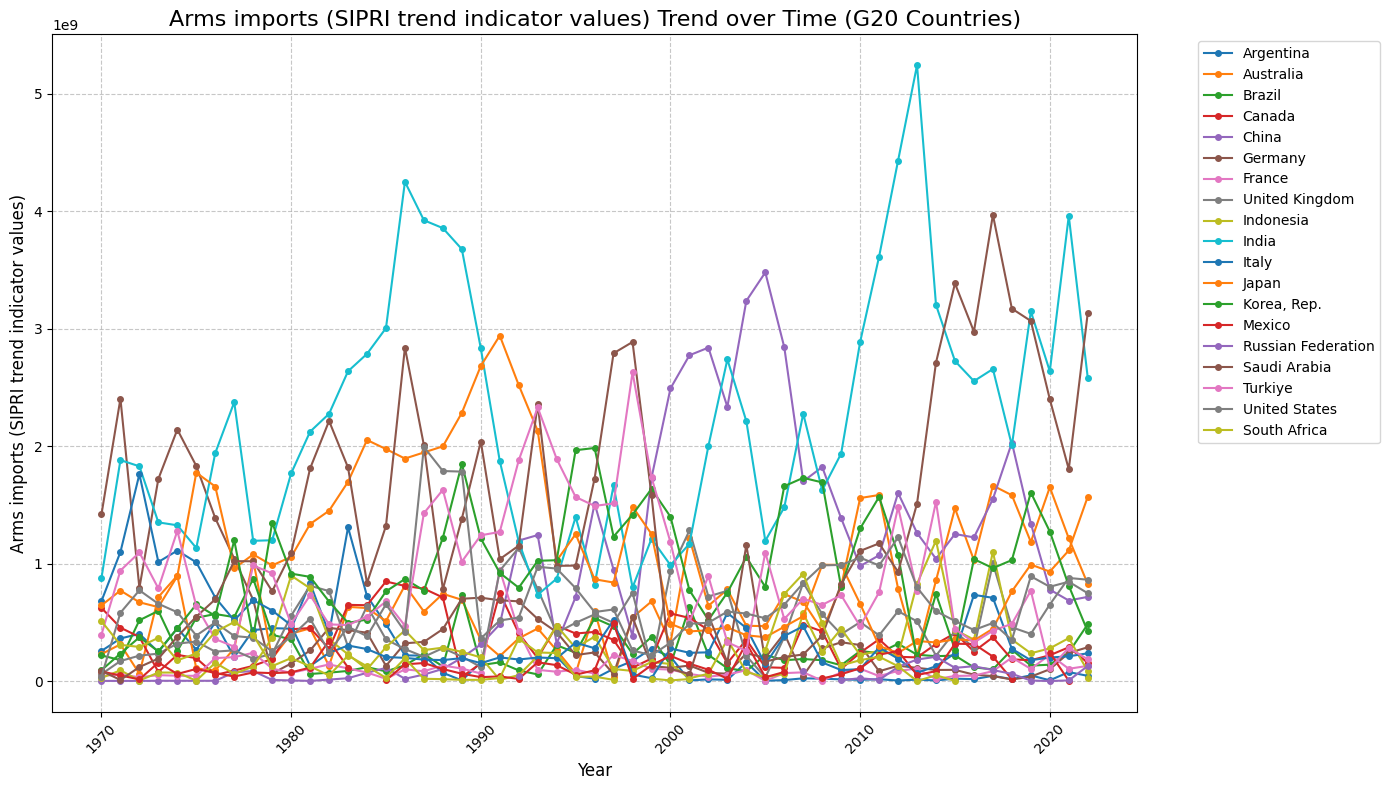

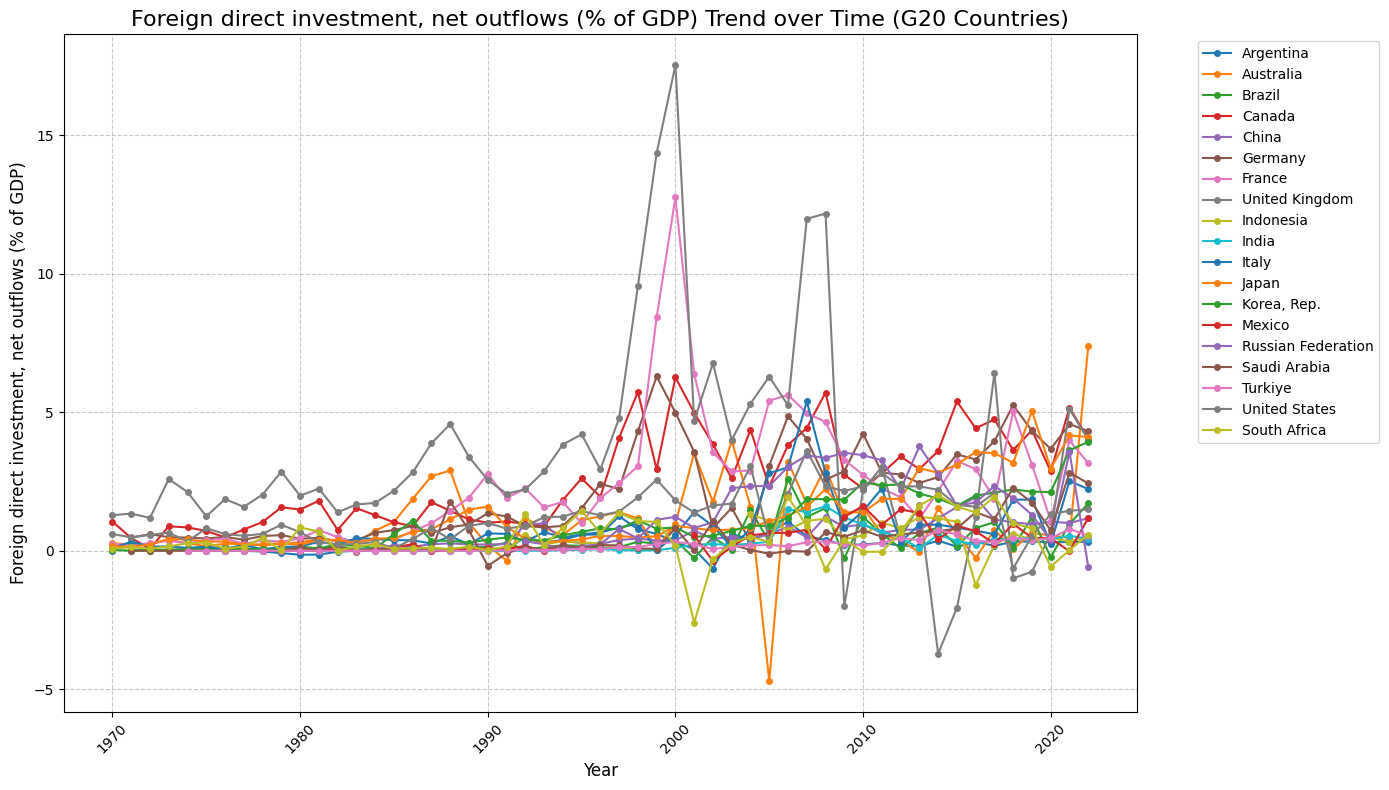

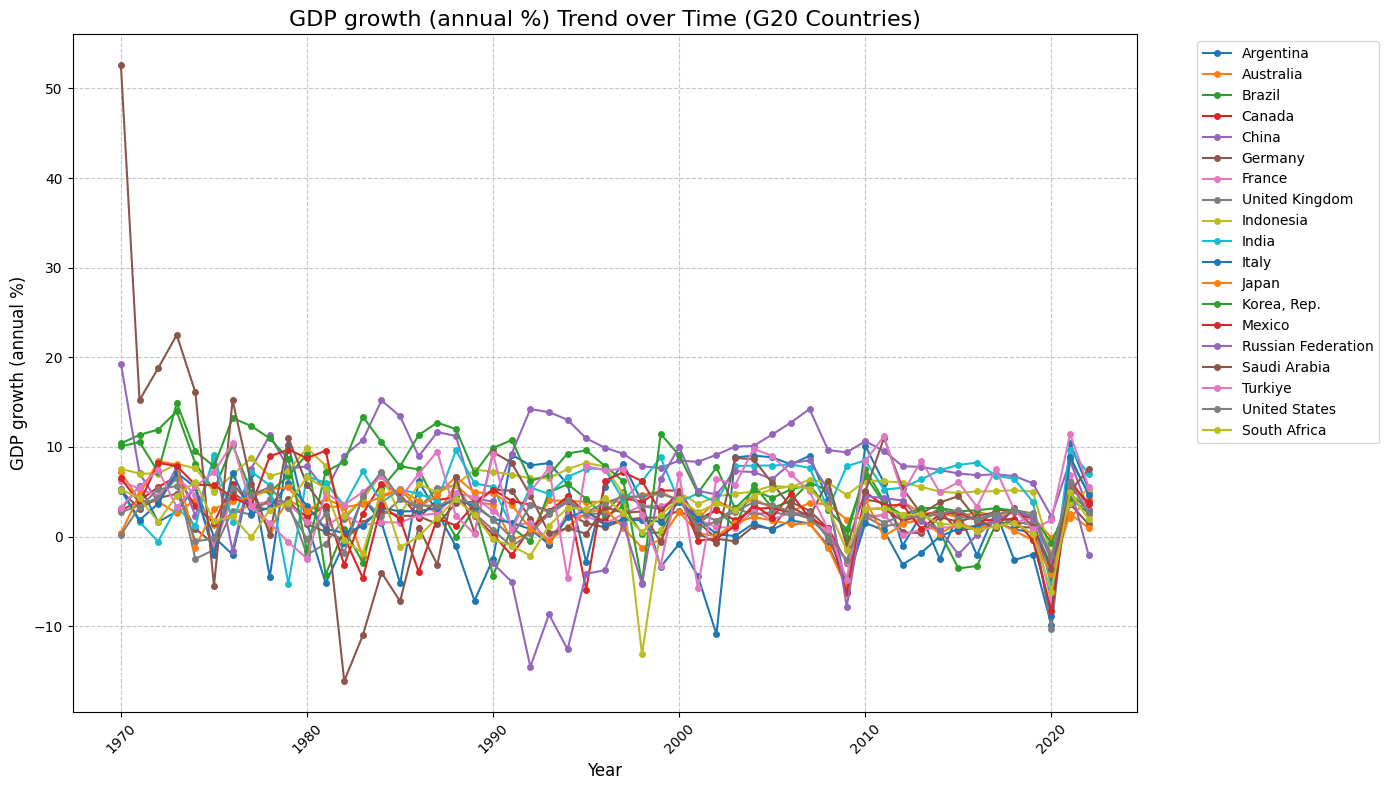

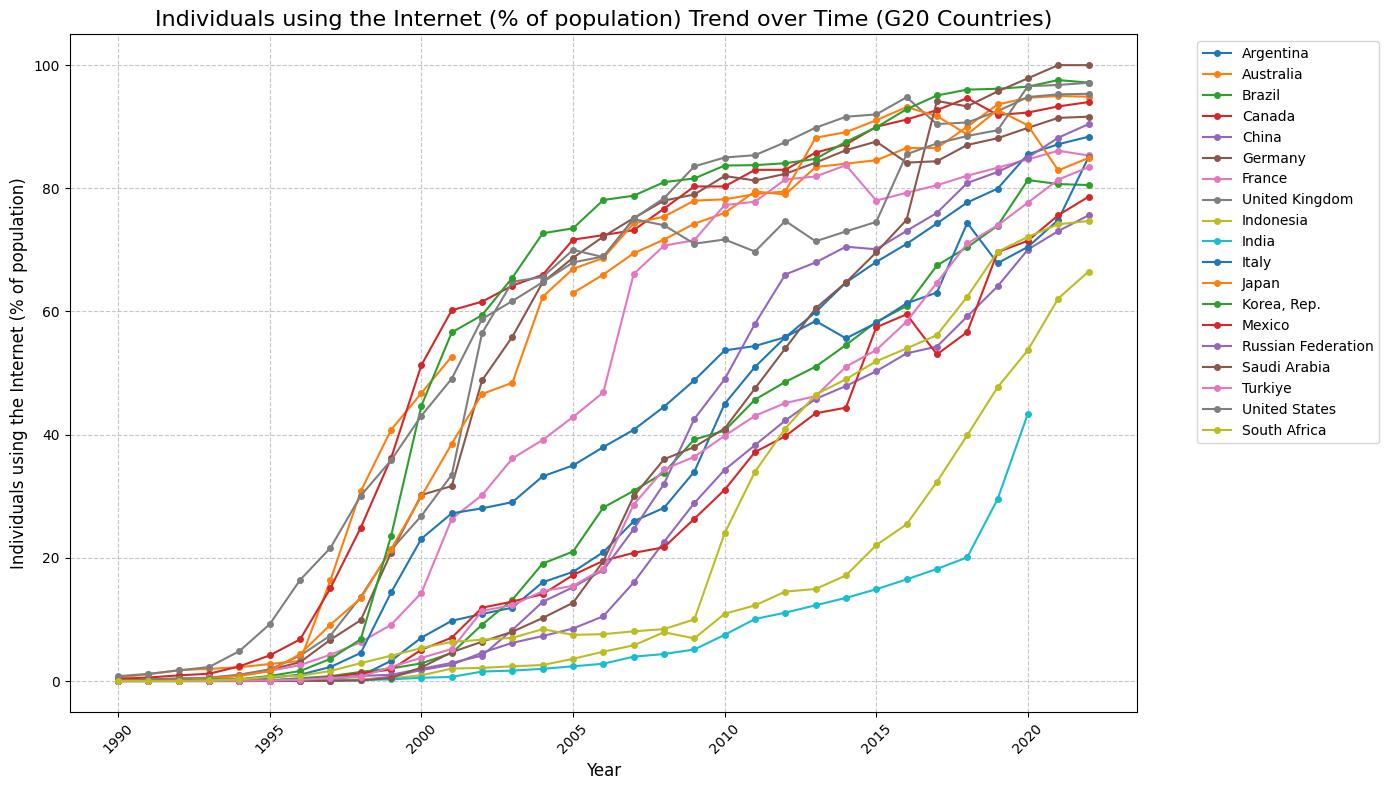

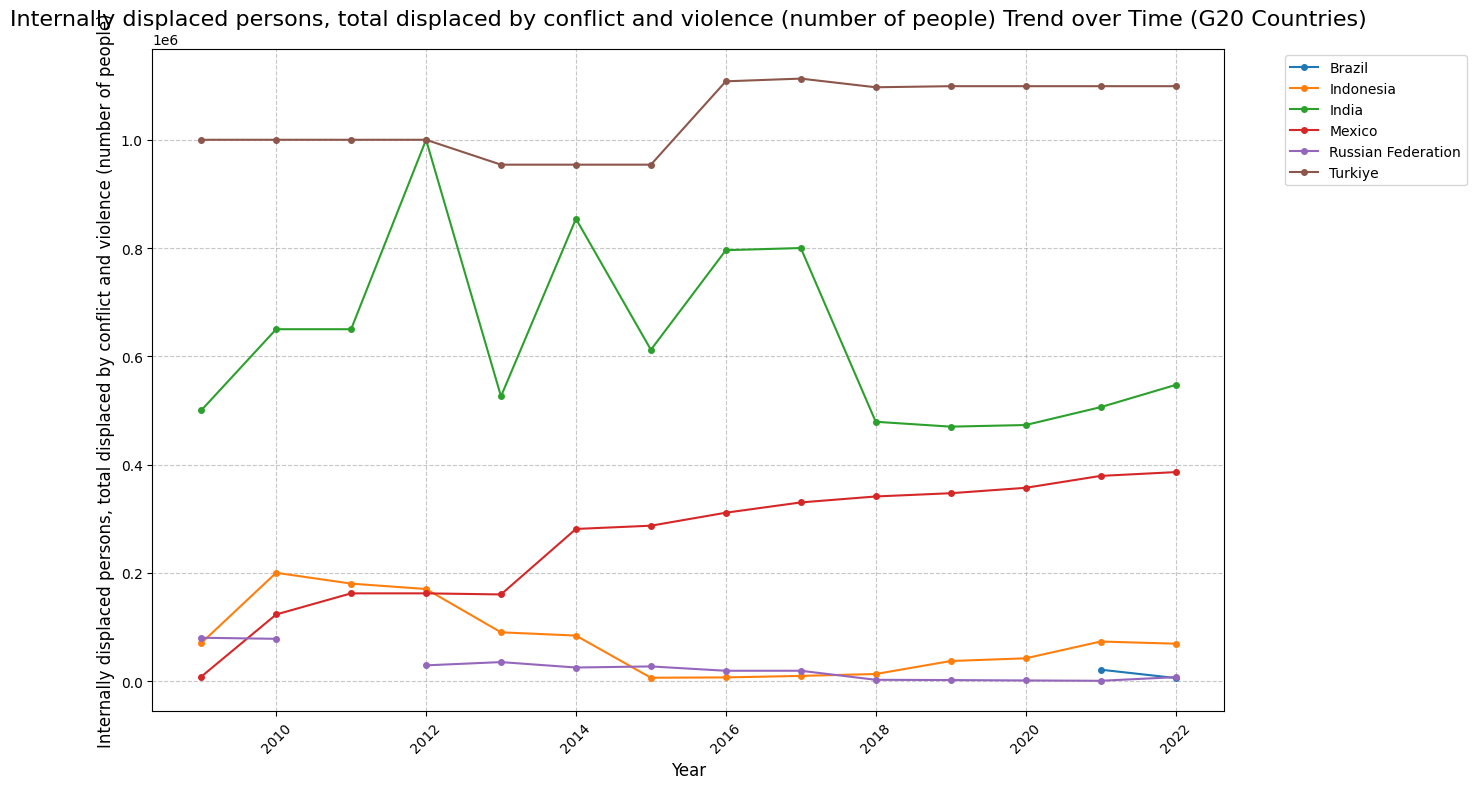

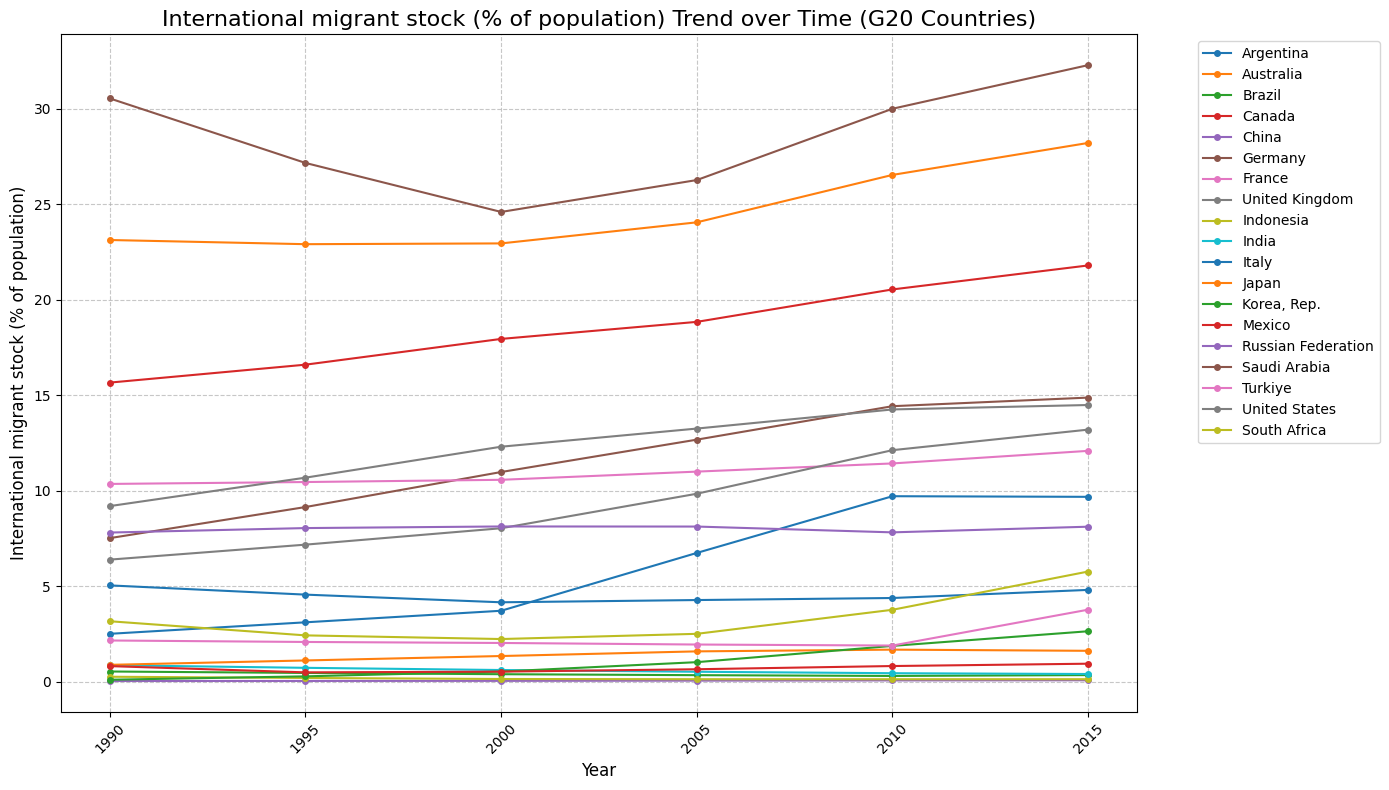

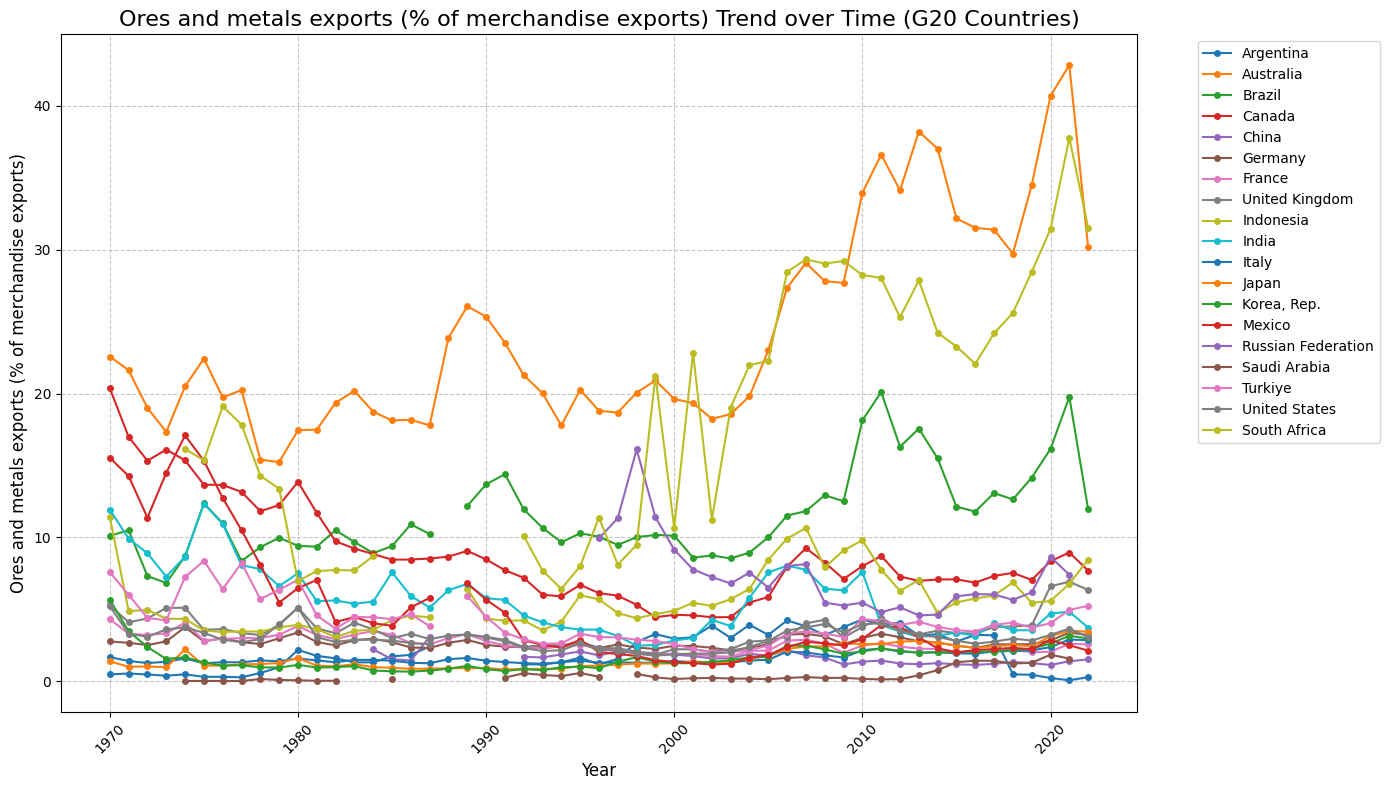

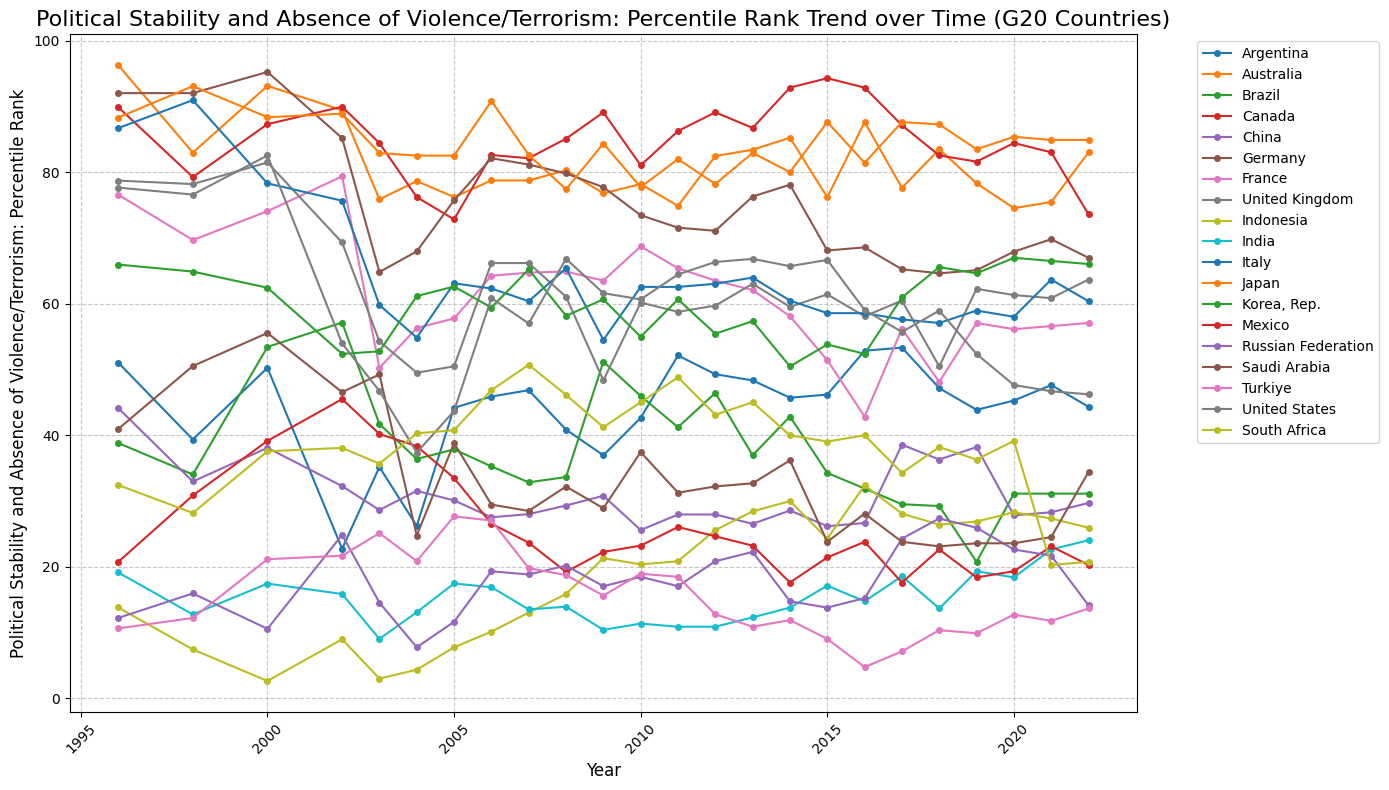

In [5]:
import os

# Create a function to visualise each indicator for every country in the G20
for indicator in unique_indicators:
    available_countries, pivot_data = visualize_indicator_g20(indicator, title_suffix="Trend over Time")
    
    # Create directory if it doesn't exist
    os.makedirs('feature_selection_plots', exist_ok=True)
    
    # Sanitize the filename by replacing invalid characters
    safe_filename = indicator.replace('/', '_').replace(':', '_').replace(' ', '_')
    
    # Save the plot with the sanitized filename
    plt.savefig(f'feature_selection_plots/{safe_filename}.png')

